<a href="https://colab.research.google.com/github/celinecresswell/learning_ML_datasci/blob/main/ang_linear_regression_excersises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Code a 5 x 5 identity matrix

iMatrix = np.array([[1, 0, 0, 0, 0],
           [0, 1, 0, 0, 0],
           [0, 0, 1, 0, 0 ],
           [0, 0, 0, 1, 0],
           [0, 0, 0, 0, 1]])

print(iMatrix)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


Excersise 2

Linear regression with one variable to predict profits for a food truck

Data on various cities and profits and populations for the cities

Trying to decide on which city to expand to next


In [4]:
data = pd.read_csv('Uni_linear.txt', header = None)

Learning - What does header = None do when reading in the data?

It assigns a series of numbers from 0 to number of columns 

In [5]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [6]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Before starting a task it can be useful to understand the data by visualising it. We have two properties so we can make a 2D plot.
- Scatter plot

When setting the range of the x and y axes of the plot, use the previous .describe() output to determine an appropriate range.

Text(0.5, 1.0, 'Profit prediction')

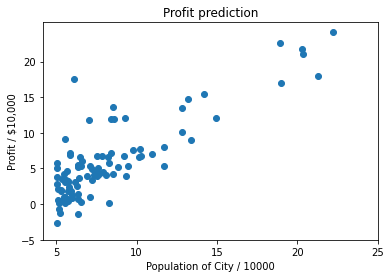

In [8]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30, step =5))
plt.yticks(np.arange(-5,25, step = 5))
plt.xlabel('Population of City / 10000')
plt.ylabel('Profit / $10,000')
plt.title('Profit prediction')

Fit the linear regression parameters theta to our dataset using gradient descent

In [9]:
# It is helpful to monitor the convergence by computing the cost
# Calculate J(theta)

def computeCost(X,y,theta):
  m = len(y)
  predictions= X.dot(theta)
  square_error = (predictions - y)**2
  
  return (1/(2*m))*np.sum(square_error)

Learning point - np.ones() returns a new array of given shape and data type. The element's value is set to 1.

In [17]:
data_n = data.values
m = data_n[:,0].size
#Add a column of 1s to x.
X = np.append(np.ones((m,1)),data_n[:,0].reshape(m,1), axis =1)
y = data_n[:,1].reshape(m,1)

#Initialise fitting parameters
theta = np.zeros((2,1))

print(theta)

computeCost(X,y,theta)

[[0.]
 [0.]]


32.072733877455676

Objective of linear regression is to minimise the cost function

- Update the equation
- Repeat until convergence

.dot() performs the dot product of two arrays

-= is a Subtraction Assignment
It subtracts a value from that variable and then assigns that new value to the variable

In [18]:
def gradientDescent(X,y,theta,alpha,n_inter):
  """
  Take in the numpy array X,y and theta
  Update theta by taking n_inter gradient steps
  With learning rate of alpha

  return theta and the list of the cost of theta during each iteration
  """

  m = len(y)
  J_history = []

  for i in range(n_inter):
    predictions = X.dot(theta)
    error = np.dot(X.transpose(),(predictions -y))
    descent = alpha * 1/m *error
    theta -= descent
    J_history.append(computeCost(X,y,theta))
  
  return theta, J_history

In [27]:
theta, J_history = gradientDescent(X,y,theta, 0.01, 1500)
print("h(x) =" + str(round(theta[0,0],2)) + " + " + str(round(theta[1,0],2)) + "x1")


h(x) =-3.9 + 1.19x1


To understand the cost function J(theta) better, plot the cost over a 2 dimensional grid of theta0 and theta1 values.

In [28]:
#Generating the values for theta0, theta 1 and the resulting cost value

theta0_vals = np.linspace(-10,10,100)
theta1_vals = np.linspace(-1,4,100)
#Create an array which will contain the resulting cost values which is filled with 0s and is the same size as the number of theta0 and theta1
J_vals = np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t = np.array([theta0_vals[i], theta1_vals[j]])
    J_vals[i,j] = computeCost(X,y,t)

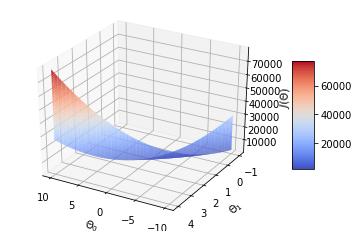

In [29]:
#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)